<a href="https://colab.research.google.com/github/adrielnascimento/analise_panilha/blob/main/analisando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho = r'/content/drive/MyDrive/Colab Notebooks/datasets/taxa_desemprego_br.csv'
df = pd.read_csv(caminho, sep=';')

In [ ]:
estados = ['4º trimestre 2012',	'4º trimestre 2013',	'4º trimestre 2014',	'4º trimestre 2015',	'4º trimestre 2016',	'4º trimestre 2017',	'4º trimestre 2018']
df[estados] = df[estados].apply(lambda x: x.str.replace(',', '.'))
df[estados] = df[estados].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sigla                 27 non-null     object 
 1   Unidade da Federação  27 non-null     object 
 2   4º trimestre 2012     27 non-null     float64
 3   4º trimestre 2013     27 non-null     float64
 4   4º trimestre 2014     27 non-null     float64
 5   4º trimestre 2015     27 non-null     float64
 6   4º trimestre 2016     27 non-null     float64
 7   4º trimestre 2017     27 non-null     float64
 8   4º trimestre 2018     27 non-null     float64
dtypes: float64(7), object(2)
memory usage: 2.0+ KB


In [ ]:
# Quais estados ou unidades federativas estão presentes no dataset?
df['Unidade da Federação']

,Unidade da Federação
0,Rondônia
1,Acre
2,Amazonas
3,Roraima
4,Pará
5,Amapá
6,Tocantins
7,Maranhão
8,Piauí
9,Ceará


In [ ]:
df.describe()

,4º trimestre 2012,4º trimestre 2013,4º trimestre 2014,4º trimestre 2015,4º trimestre 2016,4º trimestre 2017,4º trimestre 2018
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7.429630,6.485185,6.581481,8.685185,12.029630,11.603704,11.785185
std,2.347309,1.932655,2.068079,2.143452,2.913868,3.133379,3.462625
min,2.700000,2.500000,2.700000,4.200000,6.200000,6.300000,6.400000
25%,5.750000,5.200000,5.400000,7.450000,9.350000,9.400000,9.300000
50%,7.500000,6.500000,6.300000,9.000000,12.400000,11.600000,12.100000
75%,8.900000,8.000000,7.900000,9.800000,14.300000,13.350000,14.250000
max,11.800000,9.800000,10.400000,12.700000,16.800000,18.800000,19.600000


In [ ]:
# Qual é o estado com a maior taxa de desemprego em 2018?
df[['Unidade da Federação', '4º trimestre 2018']].sort_values(by='4º trimestre 2018', ascending=False).head(1)

,Unidade da Federação,4º trimestre 2018
5,Amapá,19.6


In [ ]:
# Qual é o estado com a menor taxa de desemprego em 2012?
df[['Unidade da Federação', '4º trimestre 2012']].sort_values(by='4º trimestre 2012').head(1)

,Unidade da Federação,4º trimestre 2012
21,Santa Catarina,2.7


In [ ]:
# Qual é a taxa de desemprego média para cada ano (de 2012 a 2018)
df[estados].mean()

,0
4º trimestre 2012,7.429630
4º trimestre 2013,6.485185
4º trimestre 2014,6.581481
4º trimestre 2015,8.685185
4º trimestre 2016,12.029630
4º trimestre 2017,11.603704
4º trimestre 2018,11.785185


In [ ]:
# Qual foi a maior e a menor taxa de desemprego registrada no período?
df.describe().loc[['max', 'min']]

,4º trimestre 2012,4º trimestre 2013,4º trimestre 2014,4º trimestre 2015,4º trimestre 2016,4º trimestre 2017,4º trimestre 2018
max,11.8,9.8,10.4,12.7,16.8,18.8,19.6
min,2.7,2.5,2.7,4.2,6.2,6.3,6.4


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Liste os estados cuja taxa de desemprego em 2018 foi maior que 10%.
taxa_10 = df['4º trimestre 2018'] > 10
df[['Unidade da Federação', '4º trimestre 2018']][taxa_10]

,Unidade da Federação,4º trimestre 2018
1,Acre,13.1
2,Amazonas,14.4
3,Roraima,14.0
4,Pará,10.2
5,Amapá,19.6
6,Tocantins,10.4
7,Maranhão,14.1
8,Piauí,12.3
9,Ceará,10.1
10,Rio Grande do Norte,13.4


In [ ]:
# Liste os estados cuja taxa de desemprego em 2012 foi menor que 5%.
taxa_5_2012 = df['4º trimestre 2012'] <= 5
df[['Unidade da Federação', '4º trimestre 2012']][taxa_5_2012]

,Unidade da Federação,4º trimestre 2012
20,Paraná,4.3
21,Santa Catarina,2.7
22,Rio Grande do Sul,4.3
23,Mato Grosso do Sul,5.0
24,Mato Grosso,4.6


In [ ]:
# Crie uma nova coluna chamada "Variação 2012-2018", que mostre a diferença percentual da taxa de desemprego de 2012 para 2018.
df['Variação 2012-2018'] = df['4º trimestre 2018'] - df['4º trimestre 2012']

In [ ]:
df

,Sigla,Unidade da Federação,4º trimestre 2012,4º trimestre 2013,4º trimestre 2014,4º trimestre 2015,4º trimestre 2016,4º trimestre 2017,4º trimestre 2018,Variação 2012-2018
0,RO,Rondônia,5.3,4.9,3.6,6.3,7.8,7.6,8.9,3.6
1,AC,Acre,8.1,6.9,6.2,7.7,11.7,12.2,13.1,5.0
2,AM,Amazonas,8.4,7.6,7.7,9.1,14.8,13.5,14.4,6.0
3,RR,Roraima,8.4,6.6,6.3,8.1,9.2,9.4,14.0,5.6
4,PA,Pará,6.8,6.0,7.0,8.6,12.7,10.7,10.2,3.4
5,AP,Amapá,11.8,9.2,9.5,12.7,16.8,18.8,19.6,7.8
6,TO,Tocantins,7.6,6.4,6.3,9.0,13.1,10.5,10.4,2.8
7,MA,Maranhão,7.5,5.5,7.0,8.2,13.0,13.3,14.1,6.6
8,PI,Piauí,6.9,6.9,5.9,7.2,8.8,13.3,12.3,5.4
9,CE,Ceará,7.5,6.9,6.6,9.0,12.4,11.1,10.1,2.6


In [ ]:
# Ordene o dataset de acordo com essa nova coluna, do estado que mais aumentou o desemprego para o que menos aumentou.
df = df.sort_values(by='Variação 2012-2018', ascending=False)

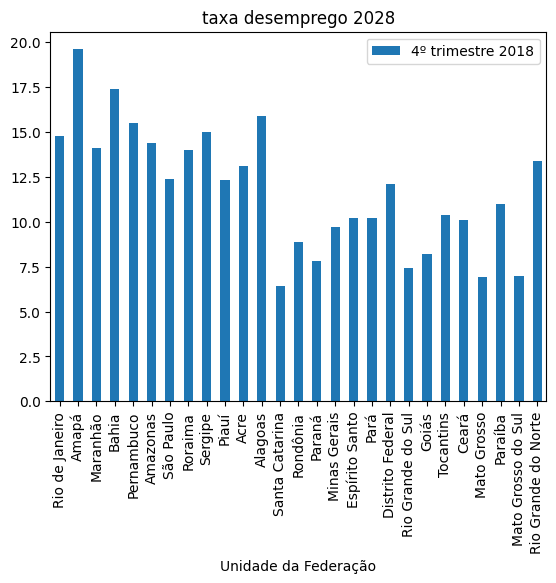

In [ ]:
# Crie um gráfico de barras mostrando a taxa de desemprego de 2018 para cada estado.
df.plot(x='Unidade da Federação', y='4º trimestre 2018', kind='bar', title='taxa desemprego 2028')
plt.show()

In [ ]:
#Qual estado teve a maior variação na taxa de desemprego entre 2012 e 2018?
indice_maior_var = df['Variação 2012-2018'].idxmax()
df.loc[indice_maior_var, ['Unidade da Federação','Variação 2012-2018']]

,18
Unidade da Federação,Rio de Janeiro
Variação 2012-2018,8.0


In [ ]:
# Qual foi a maior e a menor taxa de desemprego registrada no período, mostrando estados?
df.groupby('Unidade da Federação')[estados].max()

,4º trimestre 2012,4º trimestre 2013,4º trimestre 2014,4º trimestre 2015,4º trimestre 2016,4º trimestre 2017,4º trimestre 2018
Unidade da Federação,,,,,,,
Acre,8.1,6.9,6.2,7.7,11.7,12.2,13.1
Alagoas,11.0,9.3,9.4,11.3,14.8,15.5,15.9
Amapá,11.8,9.2,9.5,12.7,16.8,18.8,19.6
Amazonas,8.4,7.6,7.7,9.1,14.8,13.5,14.4
Bahia,10.8,9.0,9.7,12.2,16.6,15.0,17.4
Ceará,7.5,6.9,6.6,9.0,12.4,11.1,10.1
Distrito Federal,8.8,8.4,8.7,9.7,13.9,13.2,12.1
Espírito Santo,6.7,5.9,6.0,9.1,13.6,11.6,10.2
Goiás,5.1,4.0,5.0,7.7,11.2,9.4,8.2
